## K-means Clustering

#### Importing the required libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [27]:
plt.rcParams["figure.figsize"] = (10,10)

#### Importing the dataset

In [28]:
iris = datasets.load_iris()
dataset= pd.DataFrame(iris.data, columns = iris.feature_names)

#### Sample Data

In [29]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
X = dataset.iloc[:, [0, 1, 2, 3]].values

#### Calculating Within Cluster Sum of Squares

In [31]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

### Plotting the Graph for Elbow Method

Elbow Method is used to help us determine the optimal number of clsuters required.

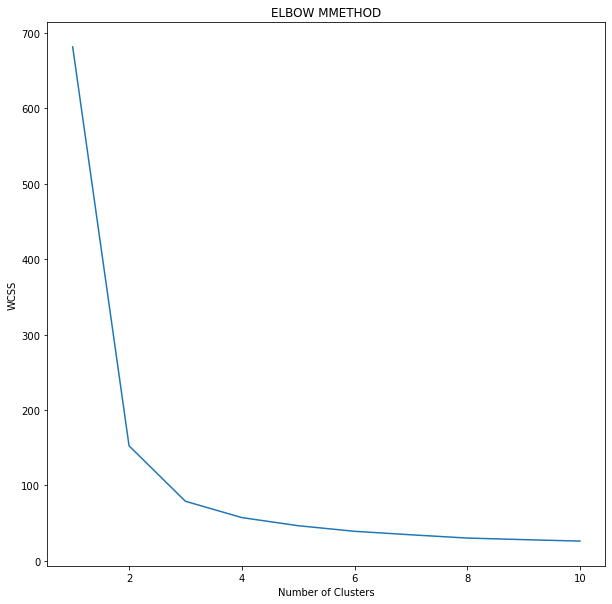

In [32]:
plt.plot(range(1,11),wcss)
plt.title('ELBOW MMETHOD')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Fitting KMeans model with a value of K = 3

In [33]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y=kmeans.fit_predict(X)

In [34]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Plotting the Clusters

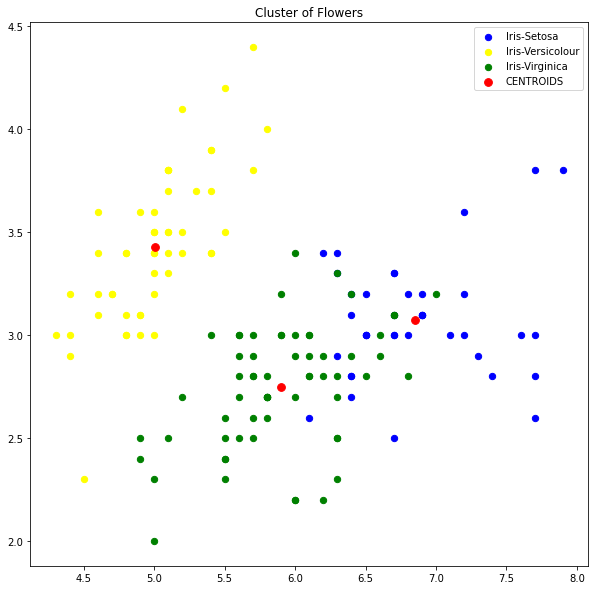

In [35]:
plt.scatter(X[y==0,0],X[y==0,1],s=40,c='blue',label='Iris-Setosa')
plt.scatter(X[y==1,0],X[y==1,1],s=40,c='yellow',label='Iris-Versicolour')
plt.scatter(X[y==2,0],X[y==2,1],s=40,c='green',label='Iris-Virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=60,c='red',label='CENTROIDS')
plt.title('Cluster of Flowers')
plt.legend()
plt.show()